In [1]:
# Cálculo polígonos de thiessen.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd
import shapely as shp

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Clase 10/"

# Nombre de la cuenca.
nombres_sub = "RH19Be_subc.shp"

# Datos de estaciones.
nombre_e = "Estaciones_Guerrero_1980.csv"

In [3]:
Subcuenca.crs

NameError: name 'Subcuenca' is not defined

In [ ]:
# Abrimos la subcuenca.

Subcuenca = gpd.read_file(path + nombres_sub)

# A coordenadas UTM 14N (m) EPSG:32614.
Subcuenca = Subcuenca.to_crs(32614)

# Datos.
print(Subcuenca.loc[0])


# Forma de la cuenca.
Subcuenca.explore()

ID                                                        155.0
CVE_SUBCUE                                               RH19Be
CVE_RH                                                     RH19
RH                                                 COSTA GRANDE
CVE_CUE                                                       B
CUENCA                                    R. COYUQUILLA Y OTROS
CVE_SUBC                                                      e
SUBCUENCA                                           R. Petatlán
AREA_KM2                                                 548.64
PERIMETRO                                                142.88
TIPO                                                    ABIERTA
DRENAJE1                                                 RH19Bf
DESCARGA1                                                     1
DRENAJE2                                                      -
DESCARGA2                                                     0
DRENAJE3                                

In [ ]:
# Abrimos las estaciones ubicadas en guerrero.

df = pd.read_csv(path + nombre_e, index_col = "NUMERO" )

# Creamos un punto con las coordenadas.
# Primero creamos una columna vacía.
df["geometry"] = None
df["geometry"] = gpd.points_from_xy(df["LONGITUD"], df["LATITUD"])

df

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry
NUMERO,,,,,,
12064,PETATLAN,Guerrero,-101.3,17.5,926,POINT (-101.30000 17.50000)
12174,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (-101.20000 17.50000)
12025,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (-101.10000 17.40000)
12017,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (-101.00000 17.60000)
12140,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (-100.90000 17.70000)
12038,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (-100.90000 17.50000)
12054,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (-101.10000 17.80000)
12094,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (-101.10000 18.00000)
12094,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (-101.40000 17.90000)


In [ ]:
# Creamos un GeoDataFrame.
Estaciones = gpd.GeoDataFrame(df, geometry = "geometry", crs = 4326)
# A coordenadas UTM 14N (m) EPSG:32614.
Estaciones = Estaciones.to_crs(32614)

# Actualizamos x, y.
Estaciones["x"] = Estaciones.centroid.x
Estaciones["y"] = Estaciones.centroid.y

# Datos
Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
NUMERO,,,,,,,,
12064,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06
12174,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06
12025,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06
12017,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06
12140,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06
12038,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06
12054,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06
12094,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06
12094,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06


In [ ]:
# Estaciones.

# Subcuenca.
map = Subcuenca.explore()
# Graficamos las estaciones.
Estaciones.explore(m = map, color = "red")

# Polígonos de Thiessen

In [ ]:
# Agregamos estaciones virtuales en los límites de la extensión de la cuenca.

# Alejamos los puntos de la cuenca para que los
# nuevos polígonos de Thiessen no toquen la cuenca.
buffer = 10000
# Obtenemos la extensión de la cuenta.
bounds = Subcuenca.total_bounds
# Creamos los puntos en las esquinas e intermedio entre cada vértice
# agregando el valor del buffer.
bbox = [ [ bounds[0] - buffer, bounds[1] - buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[1] - buffer ],
         [ bounds[2] + buffer, bounds[1] - buffer ],
         [ bounds[2] + buffer, ( bounds[1] + bounds[3] ) / 2 ],
         [ bounds[2] + buffer, bounds[3] + buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[3] + buffer ],
         [ bounds[0] - buffer, bounds[3] + buffer ],
         [ bounds[0] - buffer, ( bounds[1] + bounds[3] ) / 2 ] ]
# Creamos una tabla vacía con las geometrías de los puntos.
for i in range( len(bbox) ):
    bbox[i] = ( [f"B{i + 1}"] + [None] * ( Estaciones.shape[1] - 4 )
        + [shp.geometry.Point(bbox[i]), bbox[i][0], bbox[i][1] ] )
# Agregamos las estaciones virtuales.
Estaciones = pd.concat([Estaciones,
    pd.DataFrame(bbox, columns = Estaciones.columns)]
    ).reset_index( drop = True )

Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06
2,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06
7,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06
8,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334,POINT (224065.386 1947825.995),224065.385800,1.947826e+06


In [ ]:
Estaciones.iloc[-8:]

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
12,B1,None,NaN,NaN,None,POINT (242915.142 1926289.324),242915.141987,1.926289e+06
13,B2,None,NaN,NaN,None,POINT (272586.817 1926289.324),272586.816932,1.926289e+06
14,B3,None,NaN,NaN,None,POINT (302258.492 1926289.324),302258.491877,1.926289e+06
15,B4,None,NaN,NaN,None,POINT (302258.492 1952266.680),302258.491877,1.952267e+06
16,B5,None,NaN,NaN,None,POINT (302258.492 1978244.036),302258.491877,1.978244e+06
17,B6,None,NaN,NaN,None,POINT (272586.817 1978244.036),272586.816932,1.978244e+06
18,B7,None,NaN,NaN,None,POINT (242915.142 1978244.036),242915.141987,1.978244e+06
19,B8,None,NaN,NaN,None,POINT (242915.142 1952266.680),242915.141987,1.952267e+06


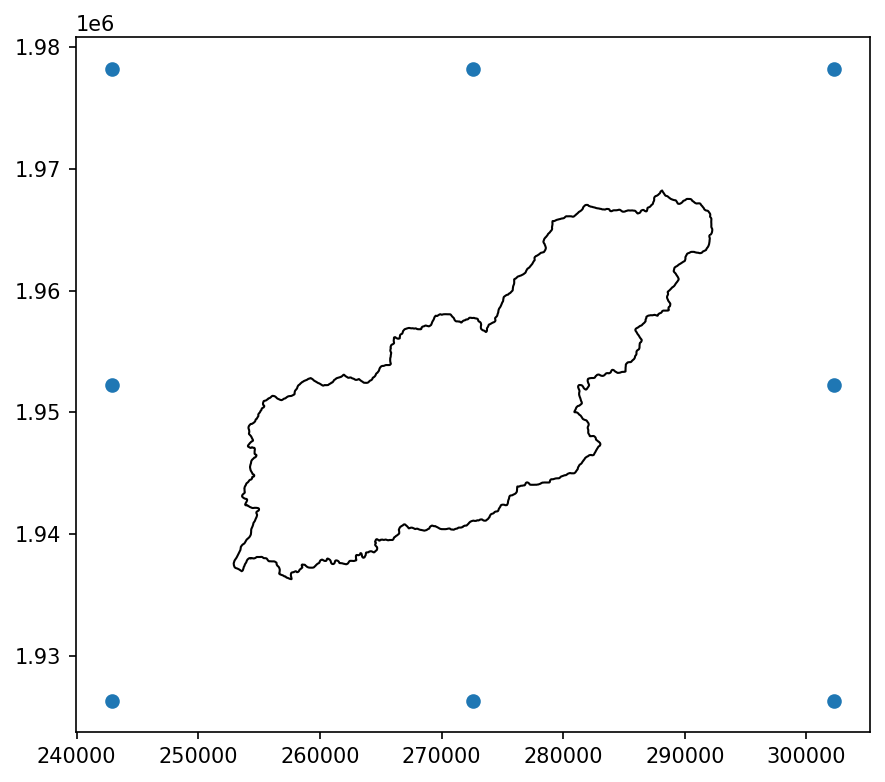

In [ ]:
# Graficamos las estaciones virtuales en los límites de la cuenca.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos las subcuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos los límites.
Estaciones.iloc[-8:].plot(ax = ax)

fig.tight_layout()
plt.show()

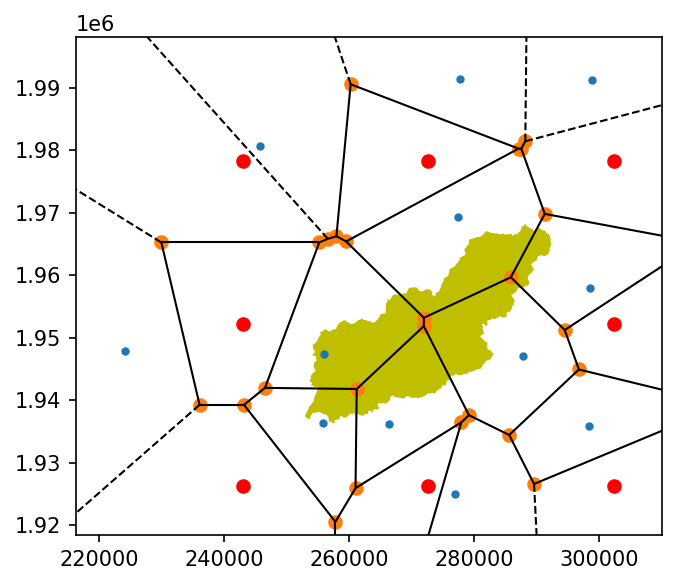

In [ ]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Graficamos la cuenca.
Subcuenca.plot(ax = ax, color = "y", zorder = 1)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax, zorder = 2)
# Graficamos los límites.
Estaciones.loc[12:, "geometry"].plot(ax = ax, color = "r", zorder = 3)

fig.tight_layout()
plt.show()

In [ ]:
# Atributos de los polígonos de Thiessen.

# Vértices --> Centroides de la triangulación.
print( Thiessen.vertices )
print()

# Indica la posición en regions que corresponde a cada punto.
print( Thiessen.point_region )

# Índices de los vértices que forman cada polígono.
# Una lista vacía es un polígono "virtual" de apoyo, hay que ignorarlo.
# Un valor negativo es un vértice de apoyo en una posición muy
# lejana (infinito); no podemos definir ese polígono.
Thiessen.regions

[[ 229907.27489689 1965255.35797575]
 [ 255169.68421512 1965255.35797575]
 [ 236027.10230041 1939278.0023067 ]
 [ 256548.65857403 1965836.9954216 ]
 [ 257915.94441557 1966254.93653904]
 [ 260192.68878743 1990566.51635186]
 [ 257750.97945917 1920562.7387156 ]
 [ 246488.25590059 1941992.06658831]
 [ 243130.25443084 1939278.0023067 ]
 [ 289535.27040358 1926619.09683901]
 [ 257750.97945917 1867397.22083632]
 [ 285558.48038493 1934452.28469209]
 [ 259466.32456225 1965416.74818196]
 [ 271910.84550036 1953206.80571248]
 [ 287054.24651695 1980268.14399874]
 [ 271895.6717485  1951870.11955308]
 [ 261161.51633714 1941814.35692201]
 [ 260974.06916303 1925948.99712469]
 [ 277905.94004184 1936487.20360128]
 [ 279120.36731516 1937626.85999104]
 [ 285819.52743235 1959687.28534177]
 [ 291248.17169748 1969826.26395093]
 [ 288132.85034559 1981450.90581598]
 [ 287495.74797176 1980263.16812984]
 [ 296712.82768472 1944934.84007442]
 [ 294440.85336043 1951249.00560519]
 [ 319968.593924   1939278.0023067 ]
 

[[2, -1, 0],
 [-1, 3, 4, 5],
 [-1, 0, 1, 3],
 [8, 2, 0, 1, 7],
 [-1, 2, 8, 6, 10],
 [14, 5, 4, 12],
 [19, 15, 16, 17, 18],
 [16, 7, 1, 3, 4, 12, 13, 15],
 [17, 6, 8, 7, 16],
 [18, 10, 6, 17],
 [19, 11, 9, -1, 10, 18],
 [23, 14, 12, 13, 20, 21],
 [-1, 22],
 [23, 14, 5, -1, 22],
 [],
 [27, 25, 24, 26, -1],
 [25, 20, 13, 15, 19, 11, 24],
 [26, 9, 11, 24],
 [27, 21, 20, 25],
 [-1, 9, 26],
 [27, 21, 23, 22, -1]]

In [ ]:
# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.point_region:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(Thiessen.regions[i]) == 0: pass
    else:
        # Si tenemos vértices en el infinito ignoramos el polígono.
        if -1 in Thiessen.regions[i]:
            Poly_th.append( shp.geometry.Polygon( ) )
    
        # Agregamos cada vértice que corresponde al polígono de Thiessen.
        else:
            for j in Thiessen.regions[i]:
                Ver_th.append( Thiessen.vertices[j] )

            # Agregamos nuevamente el primer vértice para cerrar el polígono.
            Ver_th.append( Ver_th[0] )

            # Convertimos a geometría de shapely.
            Poly_th.append( shp.geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
Estaciones["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
Estaciones = Estaciones.set_geometry("Thiessen")

# Datos.
Estaciones


,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((260974.069 1925948.997, 257750.979 1..."
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((279120.367 1937626.860, 271895.672 1..."
2,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06,GEOMETRYCOLLECTION EMPTY
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((294440.853 1951249.006, 285819.527 1..."
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((315810.776 1965255.358, 291248.172 1..."
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06,"POLYGON ((319968.594 1939278.002, 289535.270 1..."
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((287495.748 1980263.168, 287054.247 1..."
7,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06,GEOMETRYCOLLECTION EMPTY
8,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06,GEOMETRYCOLLECTION EMPTY
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334,POINT (224065.386 1947825.995),224065.385800,1.947826e+06,GEOMETRYCOLLECTION EMPTY


In [ ]:
# Retiramos las estaciones virtuales.

Estaciones = Estaciones.iloc[:-8].copy()
Estaciones["HP_1980"] = Estaciones["HP_1980"].astype(float)
Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen
0,PETATLAN,Guerrero,-101.3,17.5,926.0,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((260974.069 1925948.997, 257750.979 1..."
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999.0,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((279120.367 1937626.860, 271895.672 1..."
2,COYUQUILLA,Guerrero,-101.1,17.4,1072.0,POINT (276907.509 1925028.890),276907.509024,1.925029e+06,GEOMETRYCOLLECTION EMPTY
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465.0,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((294440.853 1951249.006, 285819.527 1..."
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903.0,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((315810.776 1965255.358, 291248.172 1..."
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833.0,POINT (298271.295 1935874.959),298271.295442,1.935875e+06,"POLYGON ((319968.594 1939278.002, 289535.270 1..."
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217.0,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((287495.748 1980263.168, 287054.247 1..."
7,CUNDANCITO,Guerrero,-101.1,18.0,1018.0,POINT (277647.945 1991445.131),277647.945195,1.991445e+06,GEOMETRYCOLLECTION EMPTY
8,VALLECITOS,Guerrero,-101.4,17.9,1647.0,POINT (245726.165 1980759.497),245726.164918,1.980759e+06,GEOMETRYCOLLECTION EMPTY
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334.0,POINT (224065.386 1947825.995),224065.385800,1.947826e+06,GEOMETRYCOLLECTION EMPTY


In [ ]:
# Graficamos los polígonos de Thiessen.
Estaciones["Thiessen"].explore()

In [ ]:
# Calculamos el área de influencia de la estación como la parte
# de la cuenca que cae dentro de cada polígono de thiessen.
Estaciones[ Subcuenca.loc[0, 'CVE_SUBCUE'] ] = Estaciones["Thiessen"
    ].intersection( Subcuenca.loc[0, "geometry"] )

# Establecemos el área de influencia como la geometría de trabajo.
Estaciones = Estaciones.set_geometry(Subcuenca.loc[0, 'CVE_SUBCUE'])

# Eliminamos las estaciones que no son relevantes para la cuenca.
subc_th = Estaciones[ ~ Estaciones.is_empty ].copy()
# Área de las áreas de influencia.
subc_th[ f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_AREA"] = subc_th.area

subc_th

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen,RH19Be,RH19Be_AREA
0,PETATLAN,Guerrero,-101.3,17.5,926.0,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((260974.069 1925948.997, 257750.979 1...","POLYGON ((261161.516 1941814.357, 261110.999 1...",3.168658e+07
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999.0,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((279120.367 1937626.860, 271895.672 1...","POLYGON ((261161.516 1941814.357, 271895.672 1...",1.036975e+08
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465.0,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((294440.853 1951249.006, 285819.527 1...","POLYGON ((271895.672 1951870.120, 271910.846 1...",1.210838e+08
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903.0,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((315810.776 1965255.358, 291248.172 1...","POLYGON ((285819.527 1959687.285, 289958.926 1...",2.549987e+07
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217.0,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((287495.748 1980263.168, 287054.247 1...","POLYGON ((285819.527 1959687.285, 271910.846 1...",1.181229e+08
10,SAN JERONIMITO,Guerrero,-101.3,17.6,789.0,POINT (255918.987 1947413.887),255918.987305,1.947414e+06,"POLYGON ((261161.516 1941814.357, 246488.256 1...","POLYGON ((254894.282 1941890.260, 254911.504 1...",1.488197e+08


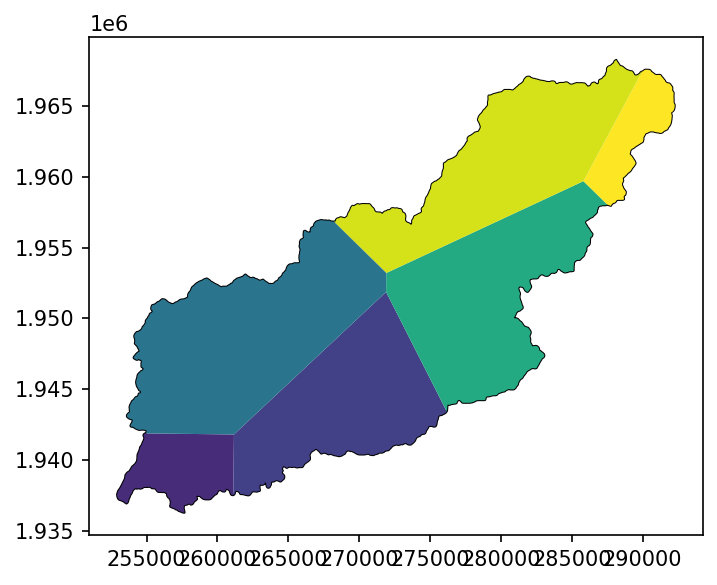

In [ ]:
# Áreas de influencia

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos la cuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las áreas de influencia.
subc_th.plot("HP_1980", ax = ax)

fig.tight_layout()
plt.show()

In [ ]:
# Precipitación media por Thiessen.

# Creamos una lista con nombres.
areas_n  = ( [ Subcuenca.loc[0, 'CVE_SUBCUE'] ] )
areas_na = [f"{x}_AREA" for x in areas_n]

# Precipitación media por Thiessen.
hp_th = []
for i in range( len(areas_na) ):
    hp_th.append( ( subc_th["HP_1980"] * subc_th[ areas_na[i] ] ).sum()
        / subc_th[ areas_na[i] ].sum() )

# Creamos un DataFrame con la precipitación media.
areas_is = pd.DataFrame( hp_th, columns = ["hp_th"],
    index = areas_n ).reset_index()
areas_is = areas_is.rename( {"index": "AREA"}, axis = 1)

areas_is

,AREA,hp_th
0,RH19Be,1129.554086


In [ ]:
# Tarea clase 10.
# El profesor te indicará y dará la información
# de la subcuenca con la que debes trabajar.
# 1. Escoge 5 estaciones del Clicom-CICESE
# (http://clicom-mex.cicese.mx/mapa.html) que sean relevantes para la cuenca.
# Da clic en la estación en el mapa -> ingresar a los datos ->
# Variable: Precipitación -> Datos: Diarios -> Graficar -> Descargar.
# 2. Encuentra un día que haya tenido precipitación.
# 3. Calcula los polígonos de Thiessen las áreas de influencia de
# los polígonos de Thiessen que caen dentro de la subcuenca.
# 4. Calcula la precipitación media por Thiessen.